In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
df = pd.read_csv("../data/processed/model_input.csv")

feature_cols = joblib.load("../model/feature_columns_v1.joblib")
model = joblib.load("../model/sales_forecast_model_v1.joblib")

X = df[feature_cols]
y = df['Sales']

print("Data & model loaded")


Data & model loaded


In [3]:
y_pred = model.predict(X)

results = pd.DataFrame({
    'Actual': y,
    'Predicted': y_pred
})

results.head()


,Actual,Predicted
0,6438,5573.677469
1,5575,5674.707223
2,4203,5462.506924
3,3031,2572.944293
4,4303,3896.386290


In [4]:
mae = mean_absolute_error(results['Actual'], results['Predicted'])
rmse = np.sqrt(mean_squared_error(results['Actual'], results['Predicted']))
mape = np.mean(np.abs((results['Actual'] - results['Predicted']) / results['Actual'])) * 100

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}%")


MAE  : 621.05
RMSE : 884.05
MAPE : 10.38%


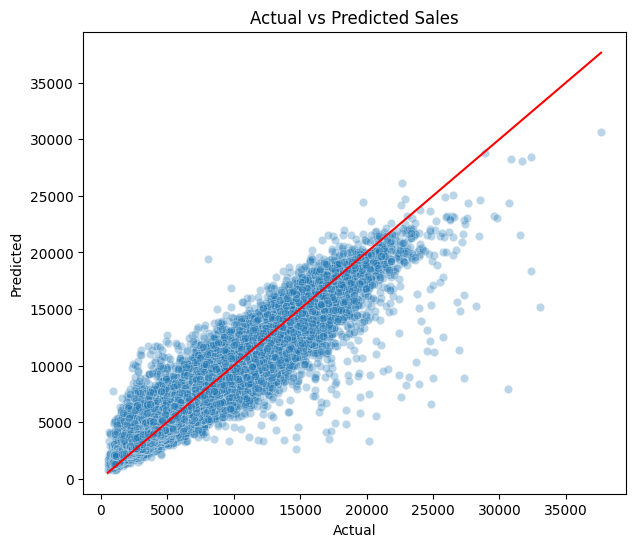

In [5]:
plt.figure(figsize=(7,6))
sns.scatterplot(x='Actual', y='Predicted', data=results, alpha=0.3)
plt.plot([results.min().min(), results.max().max()],
         [results.min().min(), results.max().max()],
         color='red')
plt.title("Actual vs Predicted Sales")
plt.show()


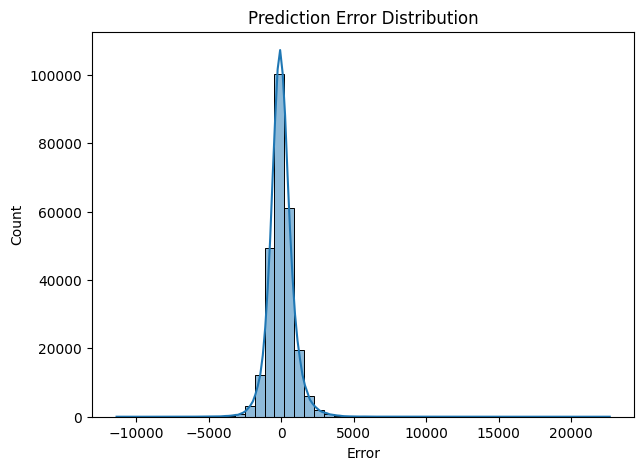

In [6]:
results['Error'] = results['Actual'] - results['Predicted']

plt.figure(figsize=(7,5))
sns.histplot(results['Error'], bins=50, kde=True)
plt.title("Prediction Error Distribution")
plt.show()


In [7]:
results['Pct_Error'] = (results['Error'] / results['Actual']) * 100

results[['Actual','Predicted','Pct_Error']].head()


,Actual,Predicted,Pct_Error
0,6438,5573.677469,13.425327
1,5575,5674.707223,-1.788470
2,4203,5462.506924,-29.966855
3,3031,2572.944293,15.112362
4,4303,3896.386290,9.449540


In [8]:
results['Pct_Error'] = (results['Error'] / results['Actual']) * 100

results[['Actual','Predicted','Pct_Error']].head()


,Actual,Predicted,Pct_Error
0,6438,5573.677469,13.425327
1,5575,5674.707223,-1.788470
2,4203,5462.506924,-29.966855
3,3031,2572.944293,15.112362
4,4303,3896.386290,9.449540


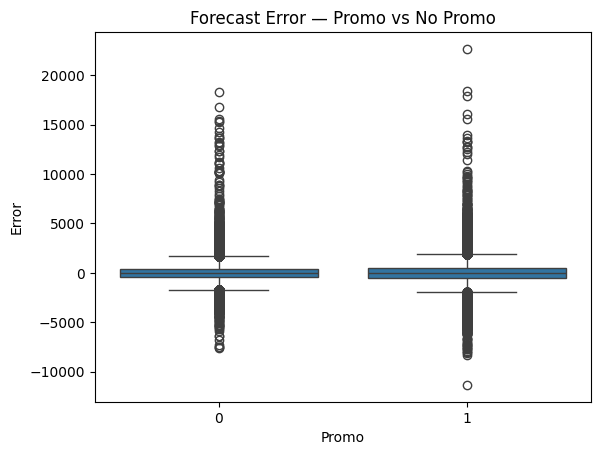

In [9]:
df_eval = df.copy()
df_eval['Predicted'] = y_pred
df_eval['Error'] = df_eval['Sales'] - df_eval['Predicted']

sns.boxplot(x='Promo', y='Error', data=df_eval)
plt.title("Forecast Error — Promo vs No Promo")
plt.show()


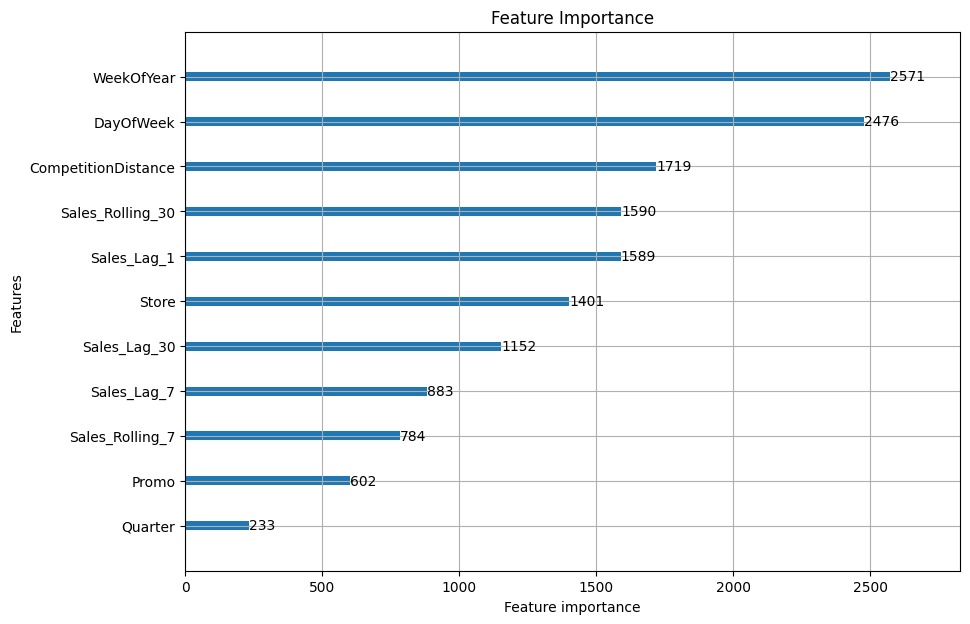

In [10]:
import lightgbm as lgb
lgb.plot_importance(model, figsize=(10,7))
plt.title("Feature Importance")
plt.show()


In [11]:
metrics = {
    "MAE": mae,
    "RMSE": rmse,
    "MAPE_percent": mape
}

pd.DataFrame([metrics]).to_csv("../reports/evaluation_metrics.csv", index=False)

print("Saved → reports/evaluation_metrics.csv")


Saved → reports/evaluation_metrics.csv
